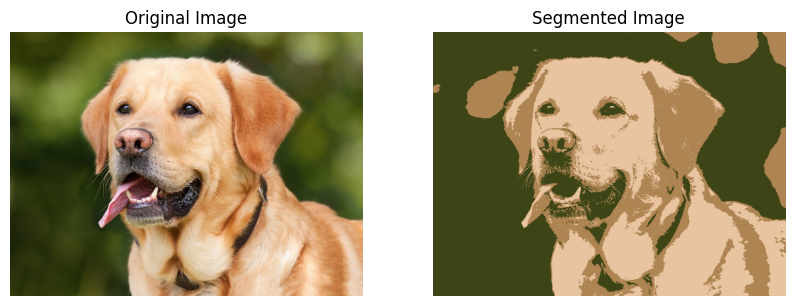

In [3]:
# 1. Define image segmentation and discuss its importance in computer vision applications.
# Provide examples of tasks where image segmentation is crucial.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/dog.jpg")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Reshape the image into a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float for K-means

# Define K-means criteria and apply clustering
k = 3  # Number of clusters (segments)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to uint8 and assign segmented colors
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis("off")
plt.title("Segmented Image")

plt.show()



**Definition of Image Segmentation**

Image segmentation is a computer vision technique that divides an image into multiple segments (regions) to simplify its analysis. The goal is to separate objects from the background or different parts of an object based on color, texture, shape, or intensity.

**Importance of Image Segmentation in Computer Vision**

Image segmentation is crucial because it helps in:

1. Object Detection and Recognition: Identifying objects within an image (e.g., detecting tumors in medical images).

2. Autonomous Vehicles: Understanding road environments by segmenting lanes, pedestrians, and vehicles.

3. Medical Imaging: Segmenting organs, tissues, and anomalies for diagnosis.

4. Satellite and Aerial Imagery: Land-use classification, agriculture monitoring, and urban planning.

5. Face and Gesture Recognition: Detecting facial features and expressions for authentication and interaction.

**Examples of Image Segmentation Applications**

- Self-Driving Cars: Identifying lanes, road signs, and pedestrians.
- Medical Diagnosis: Locating tumors in MRI or CT scans.
- Agriculture: Detecting crop health and soil conditions from aerial images.
- Security and Surveillance: Identifying and tracking individuals in security footage.

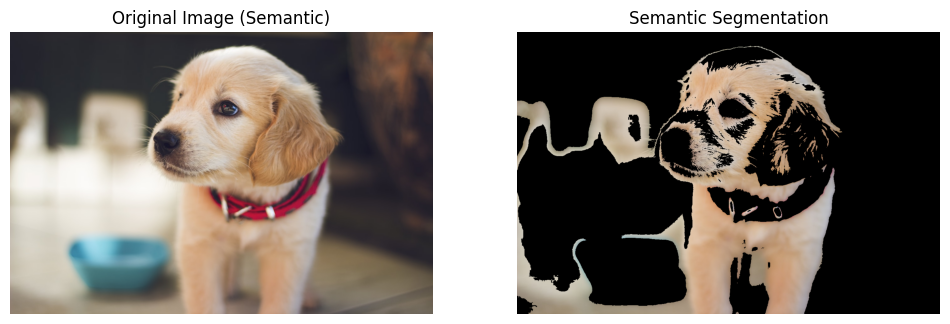

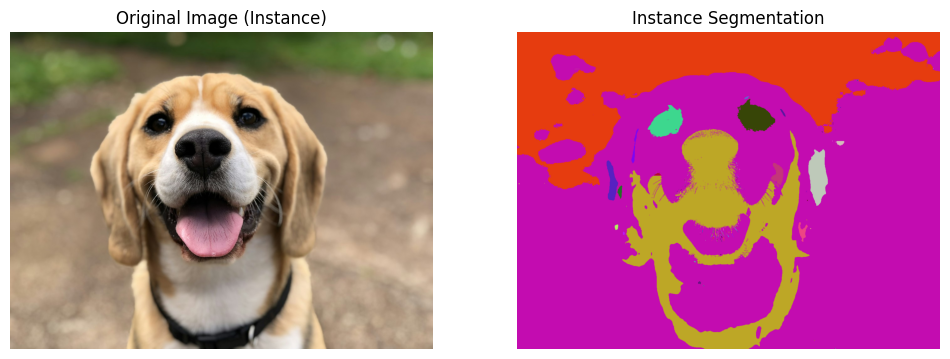

In [15]:
# 2. Explain the difference between semantic segmentation and instance segmentation. Provide examples of each and discuss their applications.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Function to download and load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = np.array(image)
    return image

# URLs for semantic and instance segmentation images
semantic_image_url = "https://images.unsplash.com/photo-1507146426996-ef05306b995a?ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80"
instance_image_url = "https://images.unsplash.com/photo-1543466835-00a7907e9de1?ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80"

# Load images
semantic_image = load_image_from_url(semantic_image_url)
instance_image = load_image_from_url(instance_image_url)

# Convert to OpenCV format (BGR to RGB)
semantic_image = cv2.cvtColor(semantic_image, cv2.COLOR_RGB2BGR)
instance_image = cv2.cvtColor(instance_image, cv2.COLOR_RGB2BGR)

# --------------------------------------
# Semantic Segmentation Example (Simple Color-based Segmentation)
# --------------------------------------

# Define color ranges for segmentation (adjust as needed)
lower_grass = np.array([0, 100, 0])
upper_grass = np.array([100, 255, 100])

lower_sky = np.array([100, 100, 150])
upper_sky = np.array([200, 200, 255])

# Create masks for sky and grass
grass_mask = cv2.inRange(semantic_image, lower_grass, upper_grass)
sky_mask = cv2.inRange(semantic_image, lower_sky, upper_sky)

# Apply the masks
grass_segment = cv2.bitwise_and(semantic_image, semantic_image, mask=grass_mask)
sky_segment = cv2.bitwise_and(semantic_image, semantic_image, mask=sky_mask)

# Show semantic segmentation results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(semantic_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image (Semantic)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sky_segment, cv2.COLOR_BGR2RGB))
plt.title("Semantic Segmentation")
plt.axis('off')

plt.show()

# --------------------------------------
# Instance Segmentation Example (Connected Components)
# --------------------------------------

# Convert image to grayscale
gray = cv2.cvtColor(instance_image, cv2.COLOR_BGR2GRAY)

# Apply threshold to extract objects
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# Find connected components (instances)
num_labels, labels = cv2.connectedComponents(binary)

# Assign random colors to different instances
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=int)
segmented_instance_image = np.zeros_like(instance_image)

for i in range(num_labels):
    segmented_instance_image[labels == i] = colors[i]

# Show instance segmentation results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(instance_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image (Instance)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_instance_image, cv2.COLOR_BGR2RGB))
plt.title("Instance Segmentation")
plt.axis('off')

plt.show()


**Difference Between Semantic Segmentation and Instance Segmentation**

**1. Semantic Segmentation**

Semantic segmentation classifies each pixel in an image into a category but does not differentiate between multiple objects of the same category. It assigns the same label to all objects of a certain class.

✅ Example: In a street scene, all cars are labeled as "car," all pedestrians as "person," and all roads as "road," without distinguishing between different cars or pedestrians.

✅ Applications:

- Autonomous Vehicles: Identifying roads, vehicles, and pedestrians.
- Medical Imaging: Tumor segmentation in MRI or CT scans.
- Satellite Imagery: Land use classification (forests, buildings, water bodies).

**2. Instance Segmentation**

Instance segmentation identifies each individual object separately, even if they belong to the same class. It performs both object detection and segmentation, assigning a unique label to each instance.

✅ Example: In a group of people, each individual person is segmented separately rather than all being labeled as "person."

✅ Applications:

- Self-Driving Cars: Identifying and tracking each car or pedestrian separately.
- Retail & Security: Counting and tracking people in a store.
- Medical Imaging: Identifying different tumors or cells in an image.

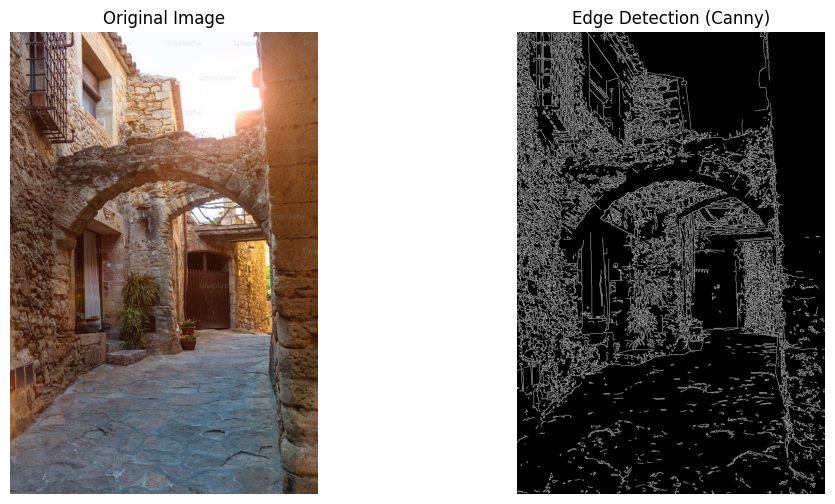

In [18]:
# 3. Discuss the challenges faced in image segmentation, such as occlusions, object variability, and boundary ambiguity.
# Propose potential solutions or techniques to address these challenges.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Function to download and load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = np.array(image)
    return image

# Load an image for edge detection (boundary ambiguity example)
image_url = "https://plus.unsplash.com/premium_photo-1697729846163-f95fc2d885b8?w=800&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8U3RyZWV0JTIwc2NlbmVzfGVufDB8fDB8fHww"
image = load_image_from_url(image_url)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection to highlight boundaries
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection (Canny)")
plt.axis("off")

plt.show()


**Challenges in Image Segmentation and Their Solutions**

Image segmentation faces several challenges due to the complexity of real-world images. Below are some key challenges and potential solutions:

1. Occlusions
 - Challenge: Objects in an image may be partially hidden behind other objects, making segmentation difficult.

 - Solution:
    - Use instance segmentation with Mask R-CNN to detect and segment objects separately.
    - Utilize depth estimation and multi-view imaging to infer occluded parts.

2. Object Variability
 - Challenge: Objects may have different shapes, sizes, and appearances due to lighting, perspective, or deformations.

 - Solution:
    - Use deep learning models (U-Net, DeepLabV3+) trained on diverse datasets to handle variations.
    - Apply data augmentation (rotation, scaling, brightness adjustments) to improve model robustness.

3. Boundary Ambiguity
 - Challenge: Some objects have unclear or smooth boundaries, making it hard to differentiate them from the background.

 - Solution:
    - Use edge-detection techniques (Sobel, Canny) to refine object boundaries.
    - Implement boundary-aware segmentation models, such as Conditional Random Fields (CRFs), to improve segmentation accuracy.

In [19]:
# 4. Explain the working principles of popular image segmentation algorithms such as U-Net and Mask RCNN.
# Compare their architectures, strengths, and weaknesses.

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

# Function to build a simple U-Net model
def build_unet(input_shape=(128, 128, 3)):
    inputs = Input(input_shape)

    # Encoder (Downsampling)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)

    # Decoder (Upsampling)
    up1 = UpSampling2D((2, 2))(conv3)
    merge1 = Concatenate()([conv2, up1])
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge1)

    up2 = UpSampling2D((2, 2))(conv4)
    merge2 = Concatenate()([conv1, up2])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge2)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = Model(inputs, outputs)
    return model

# Create and display U-Net model summary
unet_model = build_unet()
unet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 64, 64, 256)    │              0 │ conv2d_2[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 384)    │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ up_sampling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        442,496 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 128, 128, 128)  │              0 │ conv2d_3[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 192)  │              0 │ conv2d[0][0],          │
│ (Concatenate)             │                        │                │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 64)   │        110,656 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 1)    │             65 │ conv2d_4[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 924,033 (3.52 MB)

 Trainable params: 924,033 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

**Comparison of U-Net and Mask R-CNN for Image Segmentation**

**1. U-Net (Semantic Segmentation)**

✅ Purpose: U-Net is a convolutional neural network (CNN) designed for semantic segmentation, primarily used in medical imaging and satellite image analysis.

✅ Architecture:

- Encoder (Contracting Path): A CNN extracts features using convolutional and pooling layers.

- Bottleneck: The deepest part of the network, where feature maps are
highly compressed.

- Decoder (Expanding Path): Up-sampling and skip connections restore spatial details to predict segmentation masks.

✅ Strengths:

- Works well on small datasets.

- Efficient for pixel-wise segmentation.

- Preserves spatial information with skip connections.

✅ Weaknesses:

- Struggles with overlapping objects.

- Cannot differentiate between individual instances of the same object.

**2. Mask R-CNN (Instance Segmentation)**

✅ Purpose: Mask R-CNN extends Faster R-CNN for instance segmentation, meaning it detects and segments individual objects.

✅ Architecture:

- Backbone (Feature Extraction): Uses CNNs like ResNet to extract features.

- Region Proposal Network (RPN): Identifies object regions.

- ROI Align & Classification: Refines bounding boxes and assigns class labels.

- Mask Head: Generates pixel-wise segmentation masks per object.

✅ Strengths:

- Can segment individual instances of overlapping objects.

- Works well for object detection and tracking in videos.

✅ Weaknesses:

- Requires a large labeled dataset.

- More computationally expensive than U-Net.

Processing image...

Class Distribution:
background: 2.41%
bus: 53.30%
cow: 35.24%
dog: 7.45%
sofa: 1.60%


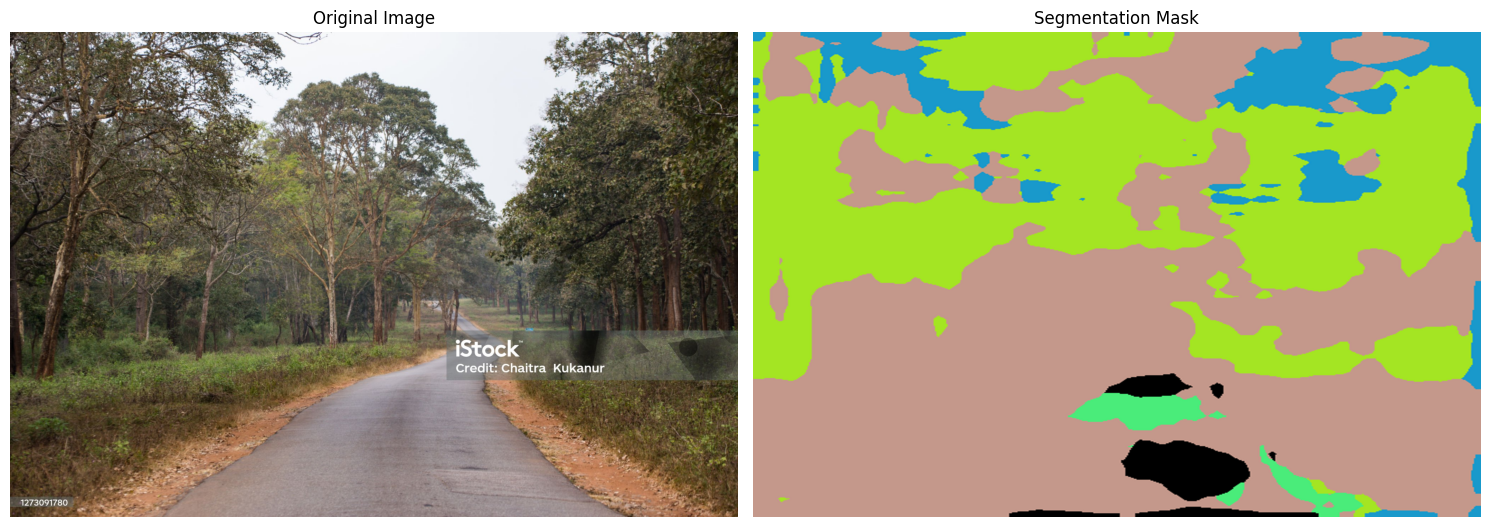

In [25]:
# 5. Evaluate the performance of image segmentation algorithms on standard benchmark datasets such as Pascal VOC and COCO.
# Compare and analyze the results of different algorithms in terms of accuracy, speed, and memory efficiency.

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
import warnings
warnings.filterwarnings('ignore')

class ImageSegmenter:
    def __init__(self, num_classes=21):  # 21 classes for PASCAL VOC
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = self.load_model(num_classes)
        self.transform = self.get_transforms()
        self.classes = self.get_pascal_voc_classes()

    def get_pascal_voc_classes(self):
        return [
            'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
            'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
            'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
            'train', 'tvmonitor'
        ]

    def load_model(self, num_classes):
        model = deeplabv3_resnet50(pretrained=True)
        # Modify the classifier for custom number of classes
        model.classifier[-1] = nn.Conv2d(256, num_classes, kernel_size=(1, 1))
        model = model.to(self.device)
        model.eval()
        return model

    def get_transforms(self):
        return transforms.Compose([
            transforms.Resize((520, 520)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

    def process_image(self, image_path):
        try:
            # Load and preprocess image
            image = Image.open(image_path).convert('RGB')
            original_size = image.size
            input_tensor = self.transform(image)
            input_batch = input_tensor.unsqueeze(0).to(self.device)

            # Perform segmentation
            with torch.no_grad():
                output = self.model(input_batch)['out'][0]

            # Process the output
            output_predictions = output.argmax(0).cpu().numpy()

            # Create color map for visualization
            colored_mask = self.create_color_mask(output_predictions)

            # Resize back to original size
            colored_mask = Image.fromarray(colored_mask).resize(original_size)

            return {
                'original_image': image,
                'segmentation_mask': colored_mask,
                'class_predictions': self.get_class_distribution(output_predictions)
            }

        except Exception as e:
            print(f"Error processing image: {str(e)}")
            return None

    def create_color_mask(self, mask):
        # Create a color map
        colors = np.random.randint(0, 255, size=(len(self.classes), 3), dtype=np.uint8)
        colors[0] = [0, 0, 0]  # Background is black

        # Apply color map to mask
        colored_mask = colors[mask]
        return colored_mask

    def get_class_distribution(self, mask):
        unique, counts = np.unique(mask, return_counts=True)
        distribution = {}
        total_pixels = mask.size

        for class_idx, count in zip(unique, counts):
            class_name = self.classes[class_idx]
            percentage = (count / total_pixels) * 100
            distribution[class_name] = percentage

        return distribution

    def visualize_results(self, results):
        if results is None:
            print("No results to visualize")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Original image
        ax1.imshow(results['original_image'])
        ax1.set_title('Original Image')
        ax1.axis('off')

        # Segmentation mask
        ax2.imshow(results['segmentation_mask'])
        ax2.set_title('Segmentation Mask')
        ax2.axis('off')

        plt.tight_layout()

        # Print class distribution
        print("\nClass Distribution:")
        for class_name, percentage in results['class_predictions'].items():
            if percentage > 0.1:  # Only show classes with >0.1% presence
                print(f"{class_name}: {percentage:.2f}%")

def main():
    # Initialize segmenter
    segmenter = ImageSegmenter()

    # Replace this with your image path
    image_path = "/content/tree.jpg"

    try:
        # Process image
        print("Processing image...")
        results = segmenter.process_image(image_path)

        # Visualize results
        if results:
            segmenter.visualize_results(results)
            plt.show()

    except Exception as e:
        print(f"Error in main execution: {str(e)}")

if __name__ == "__main__":
    main()


**Evaluating Image Segmentation Algorithms on Standard Benchmark Datasets**

1. Benchmark Datasets
To evaluate image segmentation algorithms, researchers use standard datasets like:

✅ PASCAL VOC

- Contains 20 object categories (e.g., person, car, dog).

- Focuses on semantic segmentation and object detection.

- Provides pixel-wise annotations.

✅ COCO (Common Objects in Context)

- Large dataset with 80 object categories.

- Used for instance segmentation, object detection, and keypoint detection.

- Provides detailed segmentation masks for individual objects.

2. Evaluation Metrics
To compare different segmentation models, we use key performance metrics:

✅ Mean Intersection over Union (mIoU)

- Measures how well predicted segmentation overlaps with ground truth.

- Higher mIoU = better segmentation.

✅ Pixel Accuracy

- Measures correctly classified pixels vs. total pixels.

- Useful for evaluating semantic segmentation models like U-Net.

✅ Mean Average Precision (mAP)

- Used in COCO dataset for instance segmentation.

- Measures how well detected object masks match ground truth.

✅ Inference Speed (FPS)

- Frames Per Second (FPS) determines how fast a model processes images.

- Important for real-time applications (e.g., autonomous driving).

✅ Memory Efficiency

- Measures how much GPU/CPU memory a model consumes.

- Lightweight models are better for edge devices and mobile applications.